In [34]:
import pandas as pd
import numpy as np
from math import log
from sklearn.datasets import load_boston
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt

In [2]:
Boston = load_boston()

In [3]:
df = pd.DataFrame(data=Boston.data, columns=Boston.feature_names)

In [4]:
target = pd.Series(Boston.target)

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
reg_model = OLS(target, add_constant(df), hasconst=True).fit()

In [7]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        22:03:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linearity of the Data

The linear regression model assumes that there is a straight-line relationship
between the predictors and the response. If non-linear, then conclusions will be inaccurate and the prediction accuracy of the model can be significantly reduced. If the error terms are correlated, will lead to unwarranted sense of confidence in the model as p-values associated with the model will be lower than they should be.

Residual plots are a useful graphical tool for identifying non-linearity in the
data, then a simple approach is to use non-linear transformations of the predictors, such as log X,√X, and X2, in the regression model

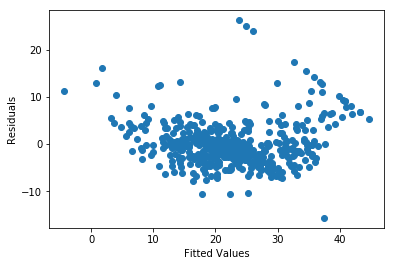

In [17]:
plt.scatter(reg_model.fittedvalues, reg_model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [30]:
def plot_least_squares(x, y):
    m ,c = np.polyfit(x, y, 1)
    plt.plot(x, y, 'o', color='blue')
    plt.plot(x, m*x + c, color='red')

The red line is a smooth fit to the residuals, which is displayed
in order to make it easier to identify any trends. The errors are uncorrelated, there is no discernible pattern.

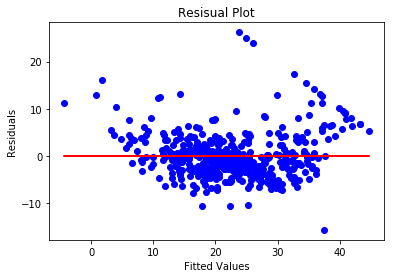

In [31]:
plot_least_squares(reg_model.fittedvalues, reg_model.resid)
plt.title("Resisual Plot")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Non-constant Variance of Error Terms  - Heteroscedasticity

Another important assumption for a linear regression model is that the error terms have a constant variance. When variances of the error terms are non-constant, it may increase with the value of the response.

Identify non-constant variances in the errors, or heteroscedasticity, from the presence of a funnel shape in  residual plot.

https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

In [55]:
log_fitted_values = pd.Series([log(x) if x > 0 else 1 for x in reg_model.fittedvalues])

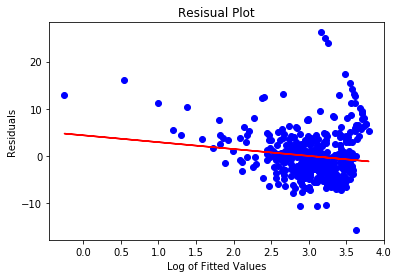

In [54]:
plot_least_squares(log_fitted_values, reg_model.resid)
plt.title("Resisual Plot")
plt.xlabel('Log of Fitted Values')
plt.ylabel('Residuals')
plt.show()

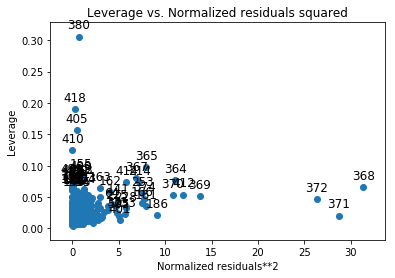

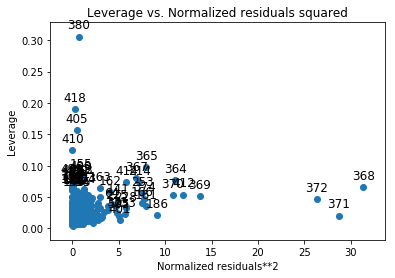

In [11]:
sm.graphics.plot_leverage_resid2(reg_model)

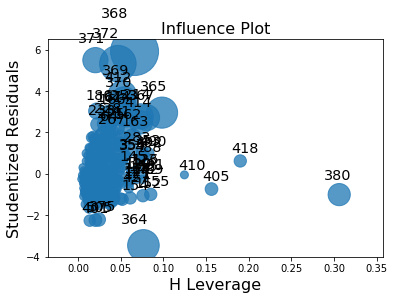

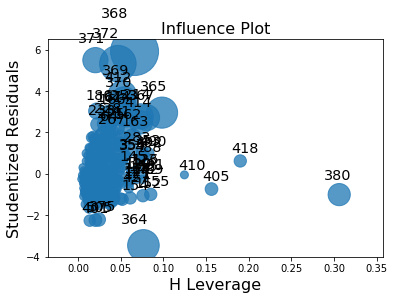

In [8]:
sm.graphics.influence_plot(reg_model)